In [1]:
# ! pip install ipynb
from ipynb.fs.full.my_functions import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [2]:
ilc = pd.read_csv(r'C:\Users\dvale\TFM\Data\ilc.csv', low_memory=False)

unflaged_columns = unflag(ilc.columns)
ilc = ilc[unflaged_columns]

ilc = ilc.drop(irrelevant_columns, axis=1)

In [3]:
sociodemo = pd.read_csv(r'C:\Users\dvale\TFM\Data\sociodemo.csv')
occupation = sociodemo.copy()
occupation = occupation[['id', 'weight', 'material_deprivation', 'sex', 'age']]

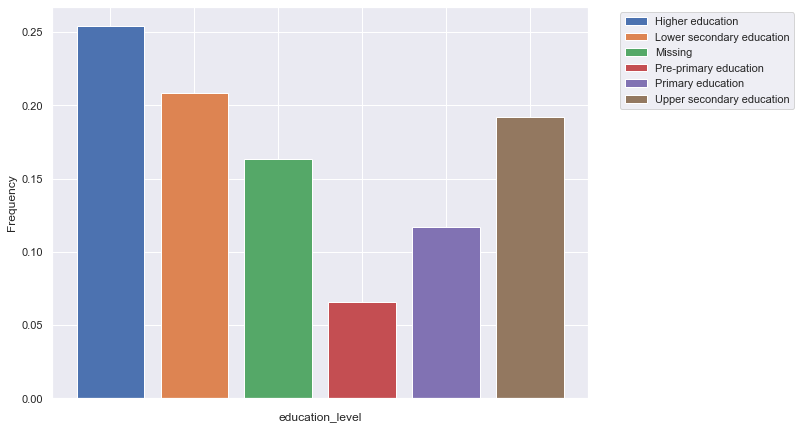

In [4]:
mapped_education_level = {'Higher education': 'Higher education', 
                          'Lower secondary education': 'Lower secondary education', 
                          'Primary education': 'Primary education', 
                          'Early childhood education': 'Pre-primary education', 
                          'Upper secondary education (not further specified)': 'Upper secondary education', 
                          'Upper secondary education (general education)': 'Upper secondary education', 
                          'Upper secondary education (vocational education - with direct access to tertiary education)': 'Upper secondary education',
                          'Upper secondary education (vocational education - without direct access to tertiary education)': 'Upper secondary education', 
                          'Post-secondary non-tertiary education (not further specified)': 'Upper secondary education', 
                          'Post-secondary non-tertiary education (vocational education)': 'Upper secondary education'}

occupation['education_level'] = ilc['Highest ISCED level attained'].map(mapped_education_level)

occupation.education_level = occupation.education_level.fillna('Missing')

barplot(x='education_level', data=occupation, legend=True)

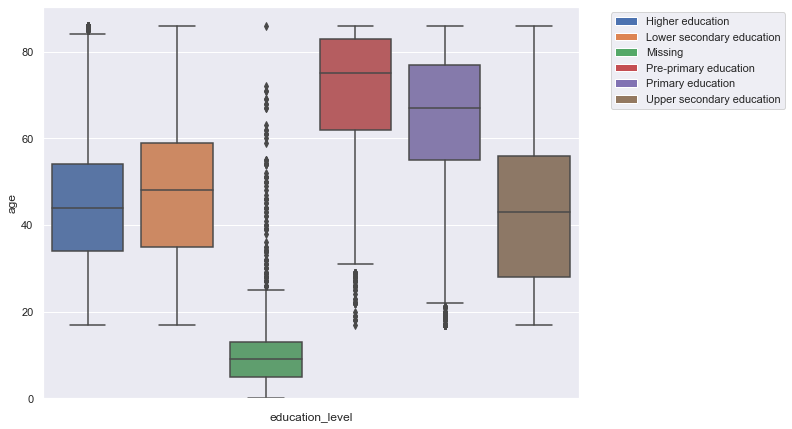

In [5]:
boxplot(x='education_level', y='age', data=occupation, legend=True)

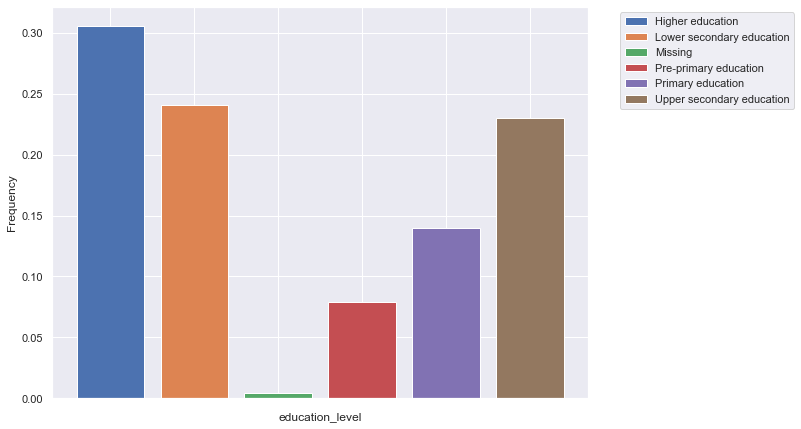

In [6]:
occupation.education_level = occupation.apply(lambda row: "Minor" 
                                              if row['age'] < 18 
                                              else row['education_level'],
                                              axis=1)

barplot(x='education_level', data=occupation[occupation.education_level != 'Minor'], legend=True)

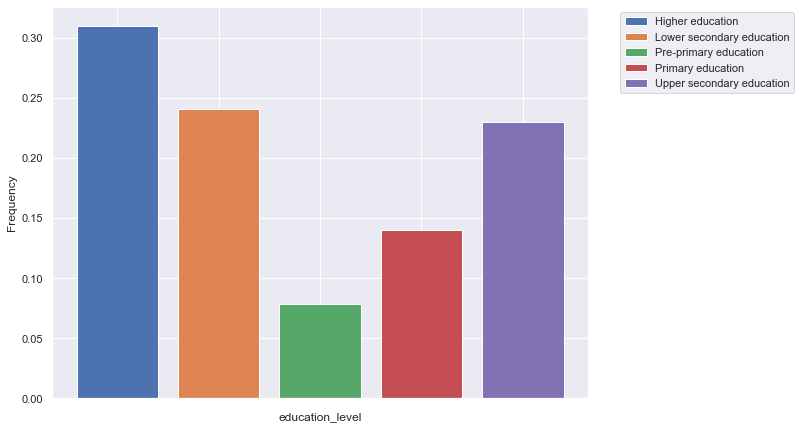

In [7]:
occupation['education_level'] = occupation.apply(lambda row: occupation.education_level.mode()[0] 
                                                 if row['education_level'] == 'Missing'
                                                 else row['education_level'],
                                                 axis=1)

barplot(x='education_level', data=occupation[occupation.education_level != 'Minor'], legend=True)

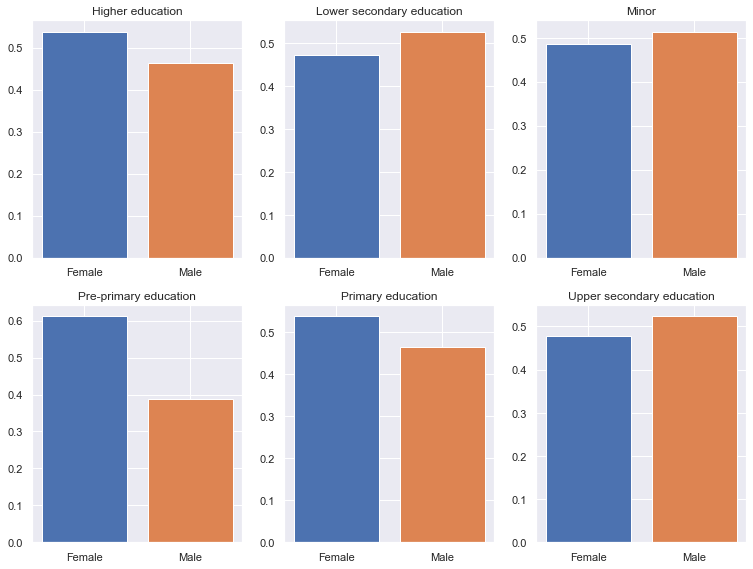

In [8]:
bardiagram(x='education_level', hue='sex', data=occupation)

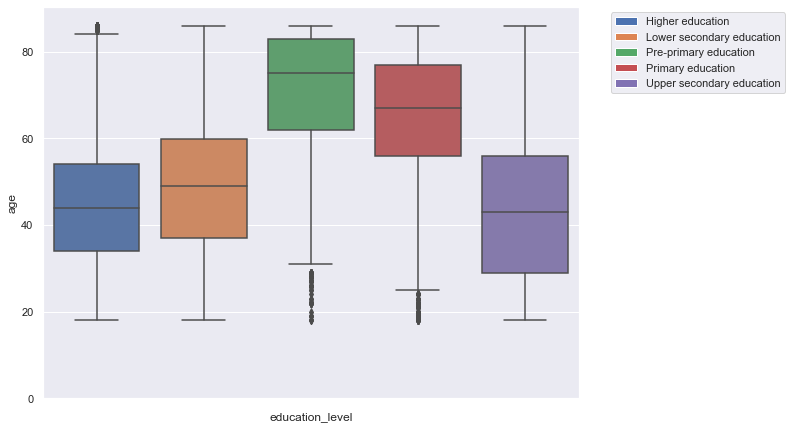

In [9]:
boxplot(x='education_level', y='age', data=occupation[occupation.education_level != 'Minor'].reset_index(), legend=True)

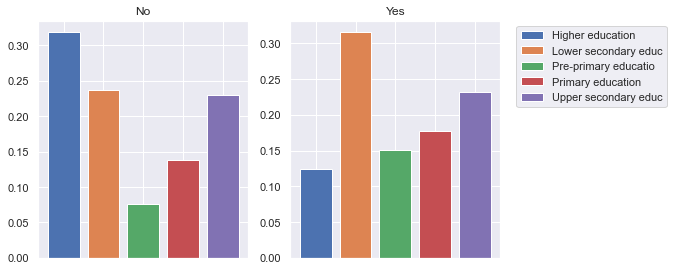

In [10]:
bardiagram(x='material_deprivation', hue='education_level', data=occupation[occupation.education_level != 'Minor'], legend=True)

In [11]:
occupation['working_status'] = ilc['Basic activity status']

mapped_working_status = {'In retirement or early retirement or has given up business': 'Retired',
                          'Other inactive person': 'Other',
                          'Unemployed' : 'Unemployed',
                          'At work': 'Employed'}

occupation.working_status = occupation.working_status.map(mapped_working_status)

occupation.working_status = occupation.working_status.fillna('Missing')

occupation.head()

,id,weight,material_deprivation,sex,age,education_level,working_status
0,101,906.15830,No,Male,70,Upper secondary education,Retired
1,102,906.15830,No,Female,68,Upper secondary education,Other
2,201,1227.68869,No,Female,72,Lower secondary education,Other
3,202,1227.68869,No,Male,60,Upper secondary education,Retired
4,301,2559.35987,No,Female,54,Higher education,Other


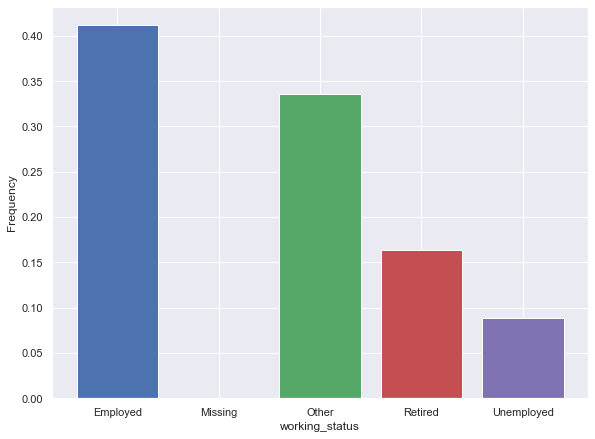

In [12]:
barplot(x='working_status', data=occupation)

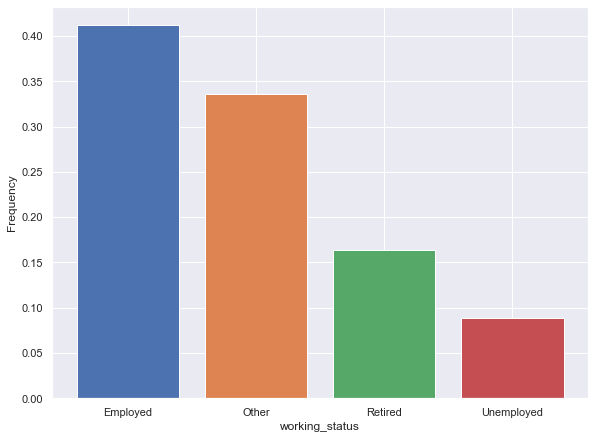

In [13]:
occupation['working_status'] = occupation.apply(lambda row: occupation.working_status.mode()[0] 
                                                if row['working_status'] == 'Missing'
                                                else row['working_status'],
                                                axis=1)

barplot(x='working_status', data=occupation)

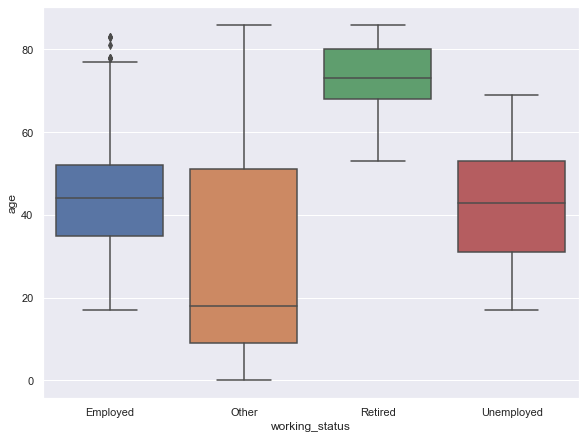

In [14]:
boxplot(x='working_status', y='age', data=occupation)

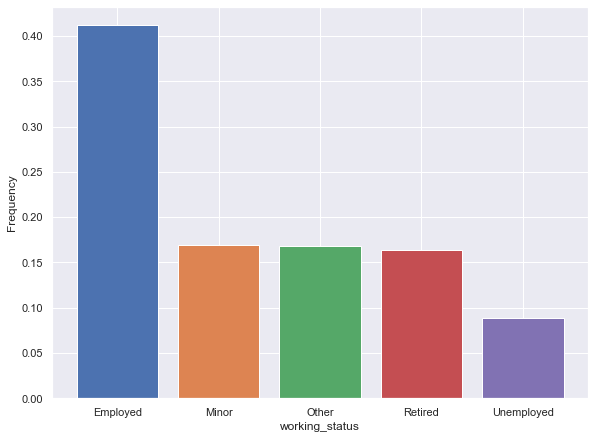

In [15]:
occupation.working_status = occupation.apply(lambda row: "Minor" 
                                             if row['age'] < 18 
                                             else row['working_status'],
                                             axis=1)

barplot(x='working_status', data=occupation)

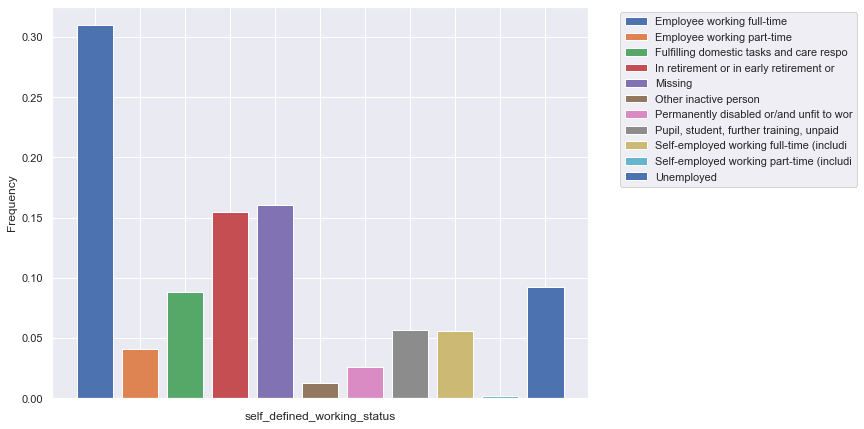

In [16]:
occupation['self_defined_working_status'] = ilc['Self-defined current economic status']

occupation.self_defined_working_status = occupation.self_defined_working_status.fillna('Missing')

barplot(x='self_defined_working_status', data=occupation, legend=True)

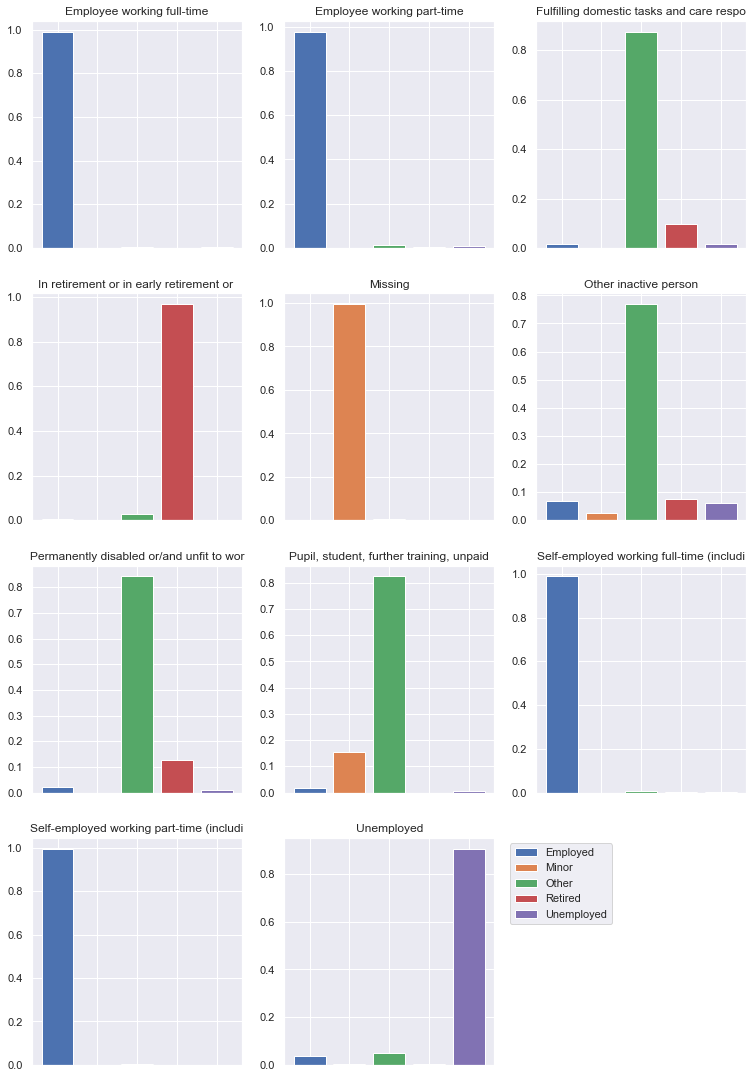

In [17]:
bardiagram(x='self_defined_working_status', hue='working_status', data=occupation, legend=True)

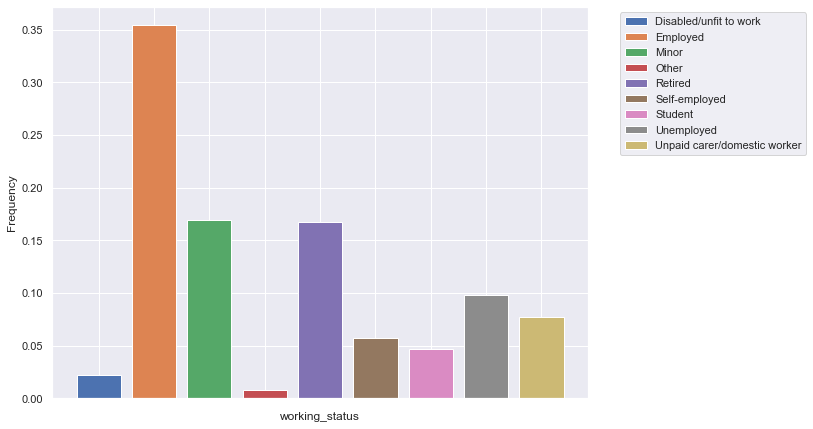

In [18]:
occupation.working_status = occupation.apply(lambda row: "Unpaid carer/domestic worker" 
                                                 if row['working_status'] == 'Other' 
                                                 and row['self_defined_working_status'] == 
                                                 'Fulfilling domestic tasks and care responsibilities'
                                                 else ("Disabled/unfit to work"
                                                    if row['working_status'] == 'Other'
                                                    and row['self_defined_working_status'] == 
                                                       'Permanently disabled or/and unfit to work'
                                                       else ('Student'
                                                          if row['working_status'] == 'Other'
                                                          and row['self_defined_working_status'] == 
                                                             'Pupil, student, further training, unpaid work experience'
                                                             else ('Unemployed'
                                                                if row['working_status'] == 'Other'
                                                                and row['self_defined_working_status'] == 
                                                                   'Other inactive person'
                                                                   else ('Retired'
                                                                      if row['working_status'] == 'Other'
                                                                      and row['self_defined_working_status'] == 
                                                                      'In retirement or in early retirement or has given up business'
                                                                      else ('Self-employed'
                                                                            if row['working_status'] == 'Employed'
                                                                            and row['self_defined_working_status'] ==
                                                                            'Self-employed working full-time (including family worker)'
                                                                            else ('Self-employed'
                                                                                  if row['working_status'] == 'Employed'
                                                                                  and row['self_defined_working_status'] ==
                                                                                  'Self-employed working part-time (including family worker)'
                                                                                  else row['working_status'])))))),
                                                 axis=1)

barplot(x='working_status', data=occupation, legend=True)

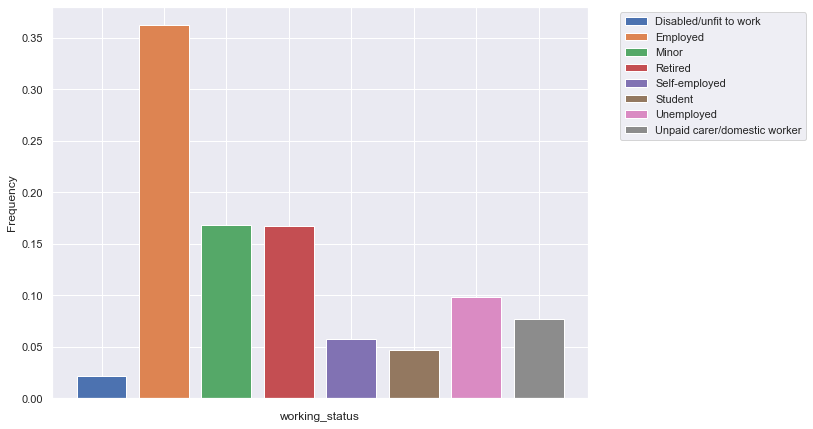

In [19]:
occupation.working_status = occupation.apply(lambda row: occupation.working_status.mode()[0]  
                                              if row['working_status'] == 'Other'
                                              else row['working_status'],
                                              axis=1)

barplot(x='working_status', data=occupation, legend=True)

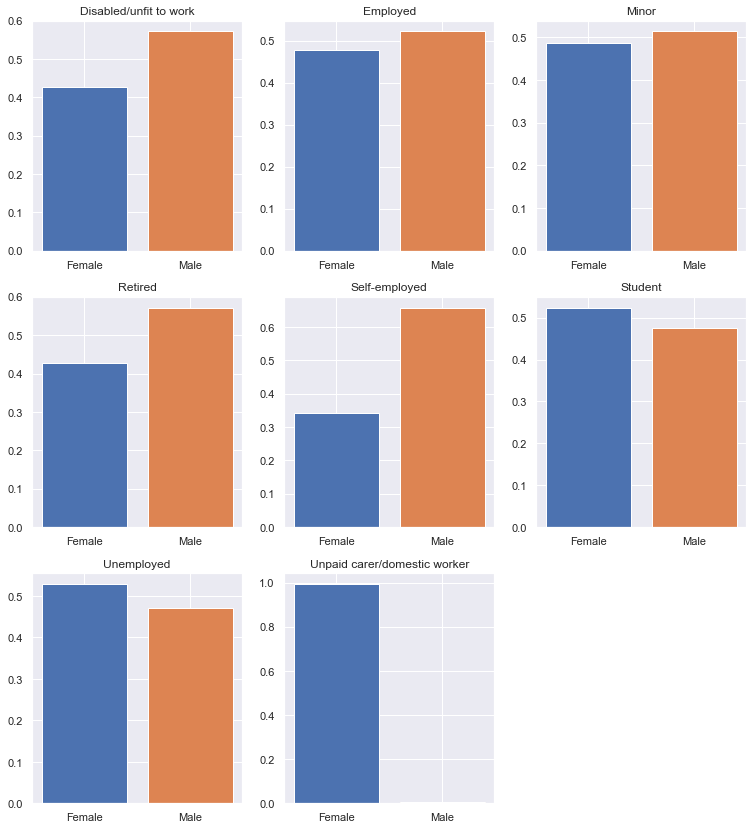

In [20]:
bardiagram(x='working_status', hue='sex', data=occupation)

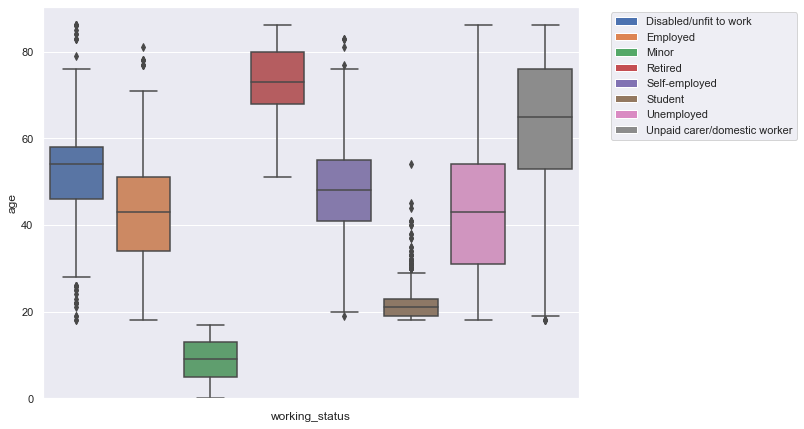

In [21]:
boxplot(x='working_status', y='age', data=occupation, legend=True)

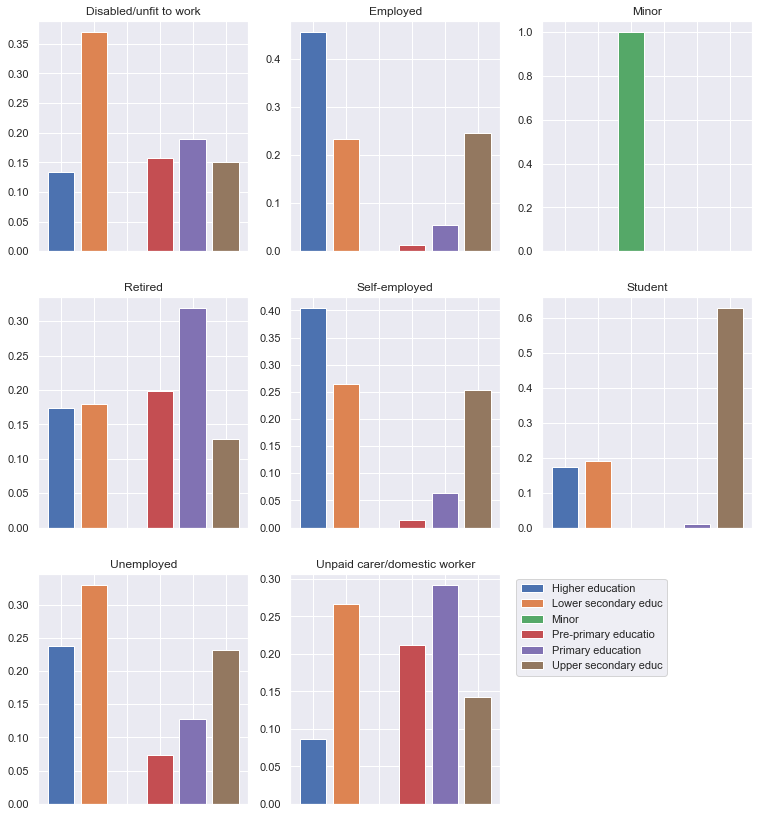

In [22]:
bardiagram(x='working_status', hue='education_level', data=occupation, legend=True)

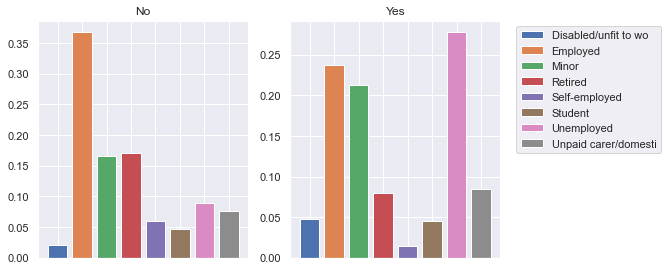

In [23]:
bardiagram(x='material_deprivation', hue='working_status', data=occupation, legend=True)

In [24]:
mapped_working_status_aggr = {'Retired': 'Economically inactive',
                              'Unpaid carer/domestic worker': 'Economically inactive', 
                              'Disabled/unfit to work': 'Economically inactive', 
                              'Unemployed': 'Unemployed',
                              'Student': 'Economically inactive',
                              'Minor': 'Economically inactive',
                              'Employed': 'Employed',
                              'Self-employed': 'Employed'}

occupation['working_status_agg'] = occupation.working_status.map(mapped_working_status_aggr)

occupation.head()

,id,weight,material_deprivation,sex,age,education_level,working_status,self_defined_working_status,working_status_agg
0,101,906.15830,No,Male,70,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive
1,102,906.15830,No,Female,68,Upper secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive
2,201,1227.68869,No,Female,72,Lower secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive
3,202,1227.68869,No,Male,60,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive
4,301,2559.35987,No,Female,54,Higher education,Disabled/unfit to work,Permanently disabled or/and unfit to work,Economically inactive


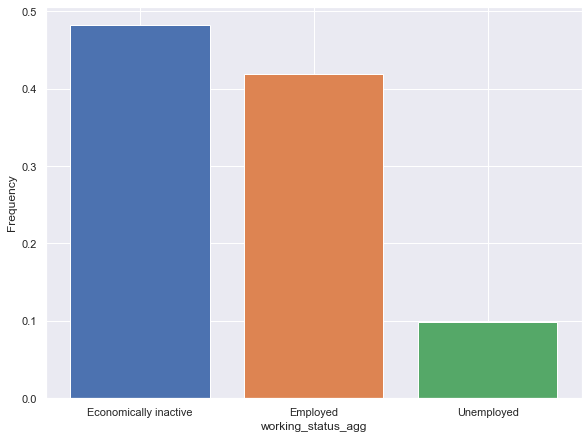

In [25]:
barplot(x='working_status_agg', data=occupation)

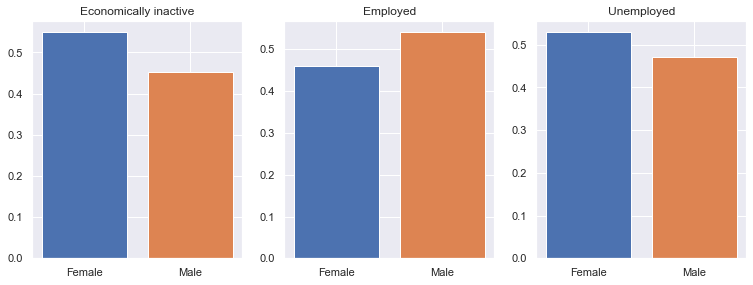

In [26]:
bardiagram(x='working_status_agg', hue='sex', data=occupation)

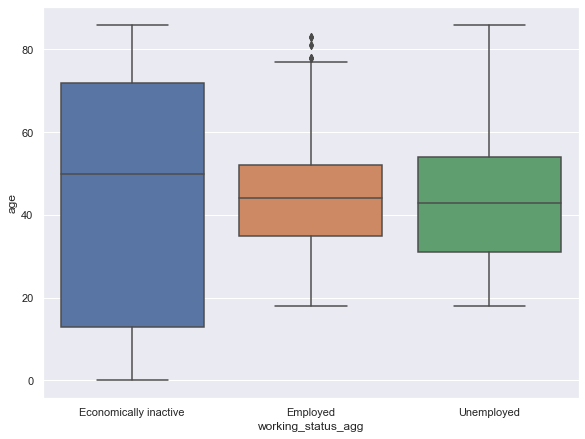

In [27]:
boxplot(x='working_status_agg', y='age', data=occupation)

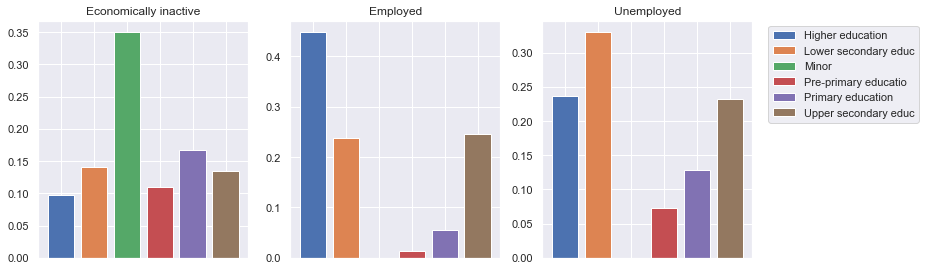

In [28]:
bardiagram(x='working_status_agg', hue='education_level', data=occupation, legend=True)

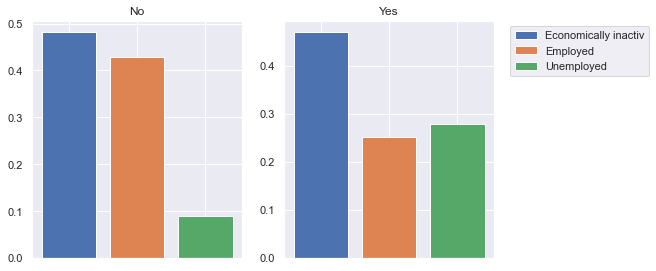

In [29]:
bardiagram(x='material_deprivation', hue='working_status_agg', data=occupation, legend=True)

In [30]:
occupation['occupation'] = ilc['Occupation']

mapped_occupation = {'Managers': 'Managers', 
                     'Chief Executives, Senior Officials and Legislators': 'Managers', 
                     'Administrative and Commercial Managers': 'Managers', 
                     'Production and Specialized Services Managers': 'Managers', 
                     'Hospitality, Retail and Other Services Managers': 'Managers', 
                     'Professionals': 'Professionals', 
                     'Science and Engineering Professionals': 'Professionals', 
                     'Health Professionals': 'Professionals', 
                     'Teaching Professionals': 'Professionals', 
                     'Business and Administration Professionals': 'Professionals', 
                     'Information and Communications Technology Professionals': 'Professionals', 
                     'Legal, Social and Cultural Professionals': 'Professionals', 
                     'Technicians and Associate Professionals': 'Technicians and Associate Professionals', 
                     'Science and Engineering Associate Professionals': 'Technicians and Associate Professionals', 
                     'Health Associate Professionals': 'Technicians and Associate Professionals', 
                     'Business and Administration Associate Professionals': 'Technicians and Associate Professionals', 
                     'Legal, Social, Cultural and Related Associate Professionals': 'Technicians and Associate Professionals', 
                     'Information and Communications Technicians': 'Technicians and Associate Professionals', 
                     'Clerical Support Workers': 'Clerical Support Workers', 
                     'General and Keyboard Clerks': 'Clerical Support Workers', 
                     'Customer Services Clerks': 'Clerical Support Workers', 
                     'Numerical and Material Recording Clerks': 'Clerical Support Workers', 
                     'Other Clerical Support Workers': 'Clerical Support Workers', 
                     'Services and Sales Workers': 'Services and Sales Workers', 
                     'Personal Services Workers': 'Services and Sales Workers', 
                     'Sales Workers': 'Services and Sales Workers', 
                     'Personal Care Workers': 'Services and Sales Workers', 
                     'Protective Services Workers': 'Services and Sales Workers', 
                     'Skilled Agricultural, Forestry and Fishery Workers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Market-oriented Skilled Agricultural Workers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Market-oriented Skilled Forestry, Fishery and Hunting Workers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Subsistence Farmers, Fishers, Hunters and Gatherers': 'Skilled Agricultural, Forestry and Fishery Workers', 
                     'Craft and Related Trades Workers': 'Craft and Related Trades Workers', 
                     'Building and Related Trades Workers (excluding Electricians)': 'Craft and Related Trades Workers', 
                     'Metal, Machinery and Related Trades Workers': 'Craft and Related Trades Workers', 
                     'Handicraft and Printing Workers': 'Craft and Related Trades Workers', 
                     'Electrical and Electronic Trades Workers': 'Craft and Related Trades Workers', 
                     'Food Processing, Woodworking, Garment and Other Craft and Related Trades Workers': 'Craft and Related Trades Workers', 
                     'Plant and Machine Operators and Assemblers': 'Plant and Machine Operators and Assemblers', 
                     'Stationary Plant and Machine Operators': 'Plant and Machine Operators and Assemblers', 
                     'Assemblers': 'Plant and Machine Operators and Assemblers', 
                     'Drivers and Mobile Plant Operators': 'Plant and Machine Operators and Assemblers', 
                     'Elementary Occupations': 'Elementary Occupations', 
                     'Cleaners and Helpers': 'Elementary Occupations', 
                     'Agricultural, Forestry and Fishery Labourers': 'Elementary Occupations', 
                     'Labourers in Mining, Construction, Manufacturing and Transport': 'Elementary Occupations', 
                     'Food Preparation Assistants': 'Food Preparation Assistants', 
                     'Street and Related Sales and Services Workers': 'Street and Related Sales and Services Workers', 
                     'Refuse Workers and Other Elementary Workers': 'Elementary Occupations'}

occupation.occupation = occupation.occupation.map(mapped_occupation)

occupation.occupation = occupation.occupation.fillna('Missing')

occupation.head()

,id,weight,material_deprivation,sex,age,education_level,working_status,self_defined_working_status,working_status_agg,occupation
0,101,906.15830,No,Male,70,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Clerical Support Workers
1,102,906.15830,No,Female,68,Upper secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Clerical Support Workers
2,201,1227.68869,No,Female,72,Lower secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Elementary Occupations
3,202,1227.68869,No,Male,60,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Services and Sales Workers
4,301,2559.35987,No,Female,54,Higher education,Disabled/unfit to work,Permanently disabled or/and unfit to work,Economically inactive,Services and Sales Workers


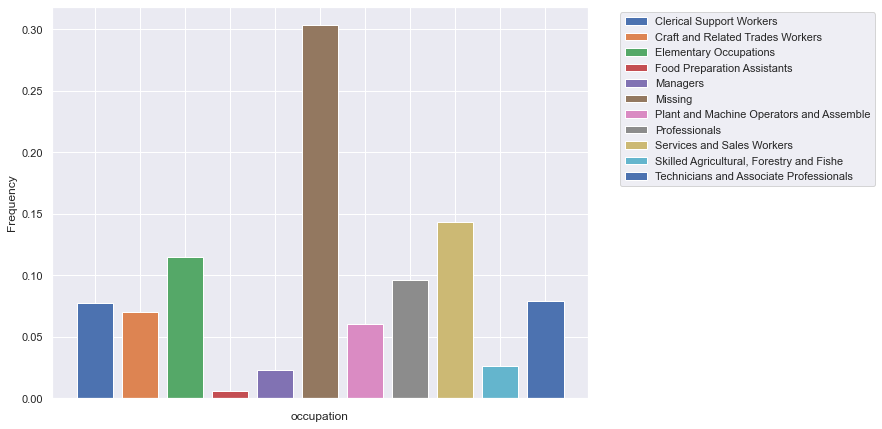

In [31]:
barplot(x='occupation', data=occupation, legend=True)

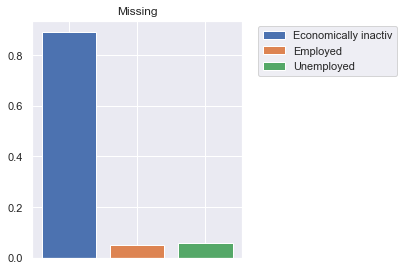

In [32]:
bardiagram(x='occupation', hue='working_status_agg', data=occupation[occupation.occupation == 'Missing'], legend=True)

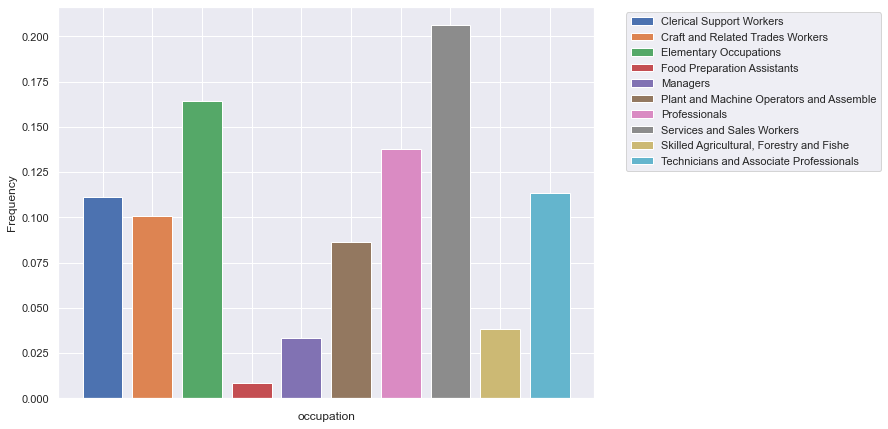

In [33]:
occupation.occupation = occupation.apply(lambda row: 'Economically inactive'  
                                         if row['occupation'] == 'Missing'
                                         else row['occupation'],
                                         axis=1)

barplot(x='occupation', data=occupation[occupation.occupation != 'Economically inactive'], legend=True)

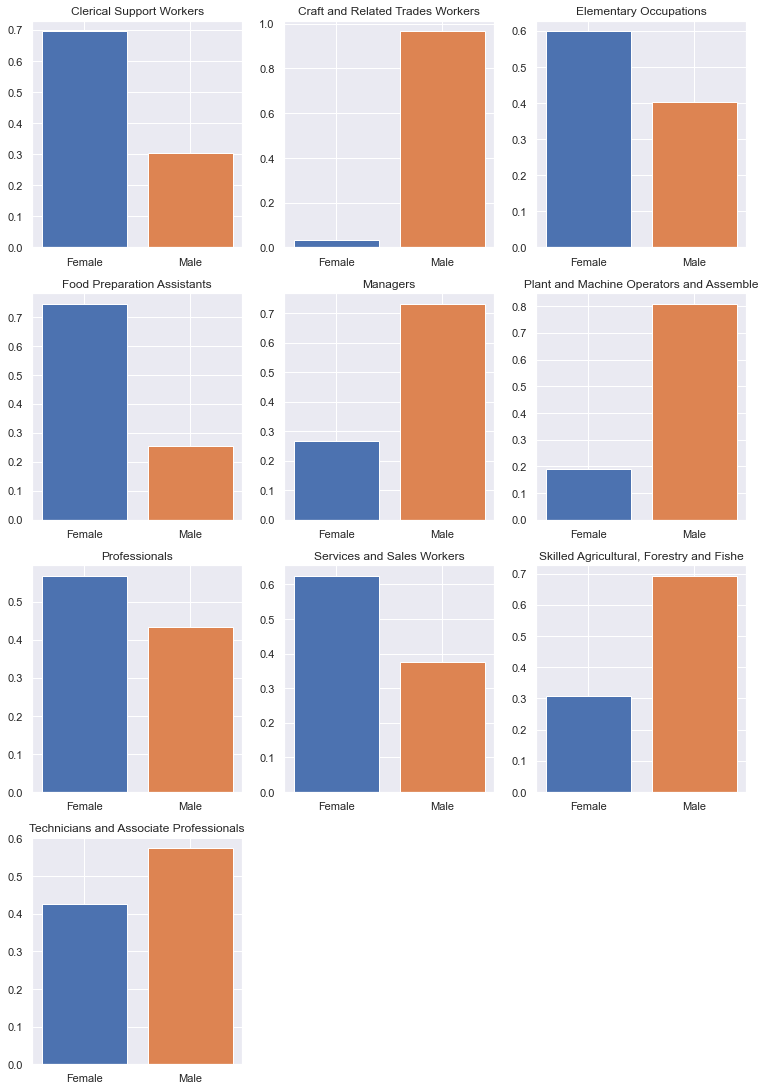

In [34]:
bardiagram(x='occupation', hue='sex', data=occupation[occupation.occupation != 'Economically inactive'])

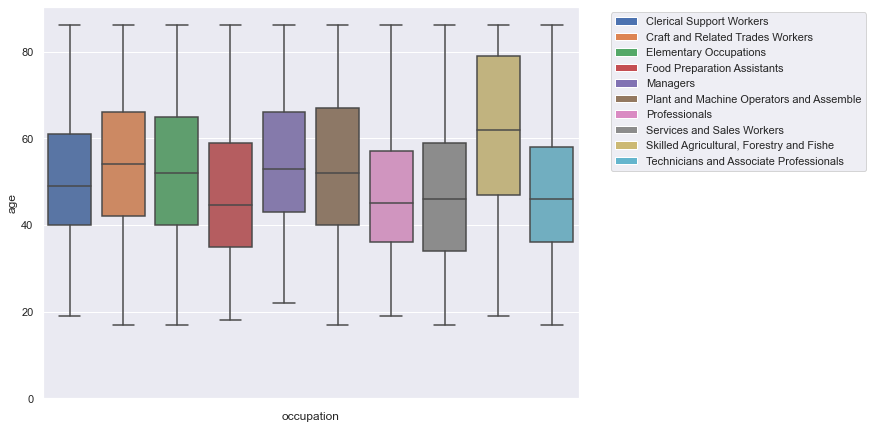

In [35]:
boxplot(x='occupation', y='age', data=occupation[occupation.occupation != 'Economically inactive'].reset_index(), legend=True)

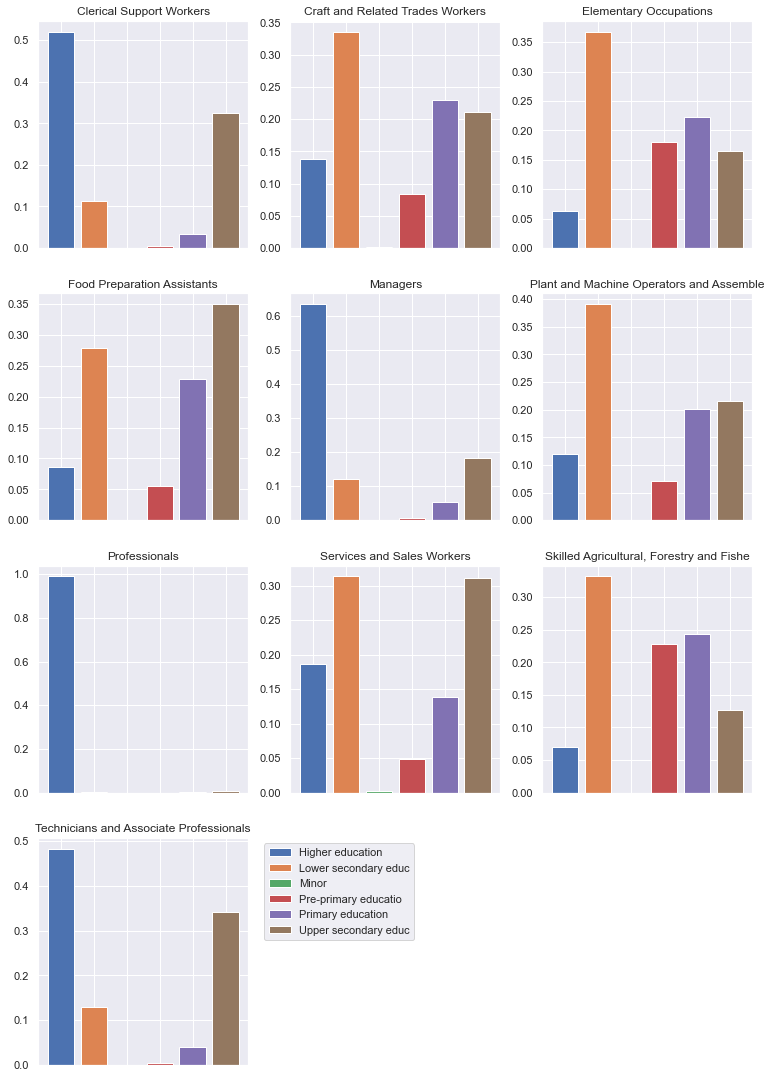

In [36]:
bardiagram(x='occupation', hue='education_level', data=occupation[occupation.occupation != 'Economically inactive'], legend=True)

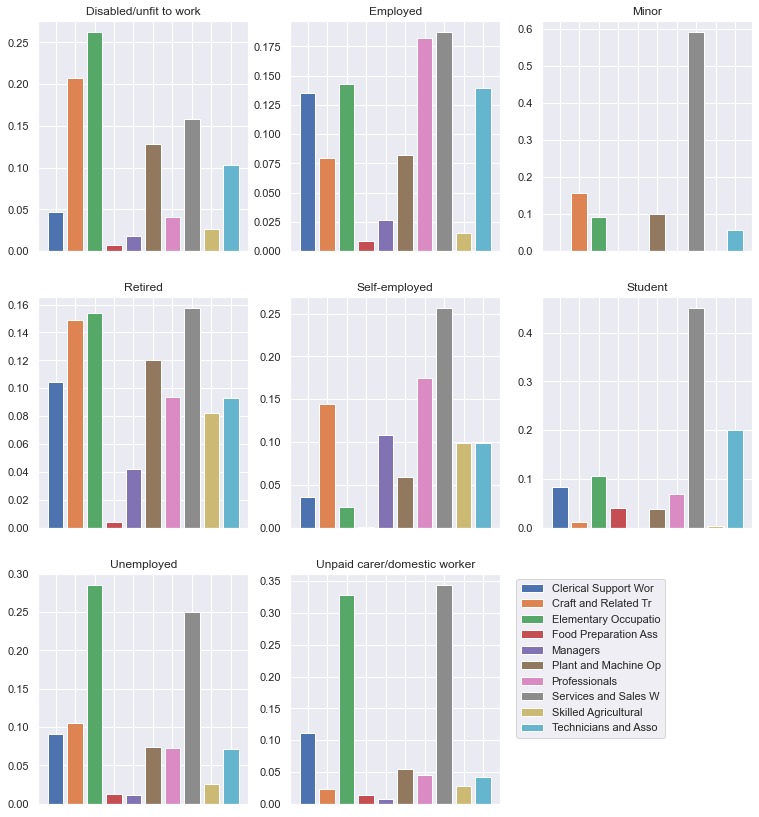

In [37]:
bardiagram(x='working_status', hue='occupation', data=occupation[occupation.occupation != 'Economically inactive'], legend=True)

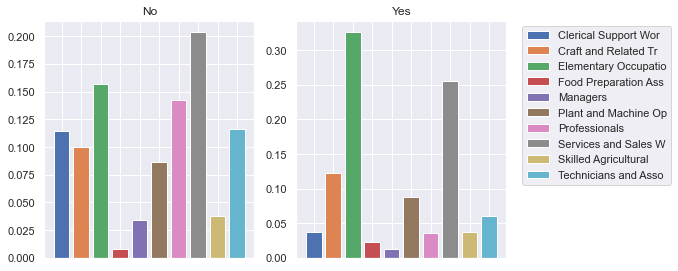

In [38]:
bardiagram(x='material_deprivation', hue='occupation', data=occupation[occupation.occupation != 'Economically inactive'], legend=True)

In [39]:
occupation['economic_sector'] = ilc['The economic activity of the local unit of the main job for respondents who are currently at work']

occupation.economic_sector = occupation.economic_sector.fillna('Economically inactive/unemployed')

occupation.economic_sector = [value[0].upper() + value[1:].lower() for value in occupation.economic_sector]

occupation.head()

,id,weight,material_deprivation,sex,age,education_level,working_status,self_defined_working_status,working_status_agg,occupation,economic_sector
0,101,906.15830,No,Male,70,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Clerical Support Workers,Economically inactive/unemployed
1,102,906.15830,No,Female,68,Upper secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Clerical Support Workers,Economically inactive/unemployed
2,201,1227.68869,No,Female,72,Lower secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Elementary Occupations,Economically inactive/unemployed
3,202,1227.68869,No,Male,60,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Services and Sales Workers,Economically inactive/unemployed
4,301,2559.35987,No,Female,54,Higher education,Disabled/unfit to work,Permanently disabled or/and unfit to work,Economically inactive,Services and Sales Workers,Economically inactive/unemployed


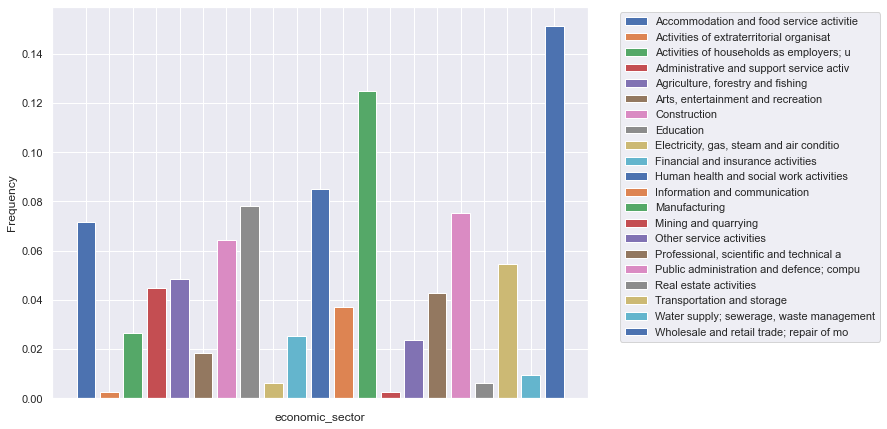

In [40]:
barplot(x='economic_sector', data=occupation[occupation.economic_sector != 'Economically inactive/unemployed'], legend=True)

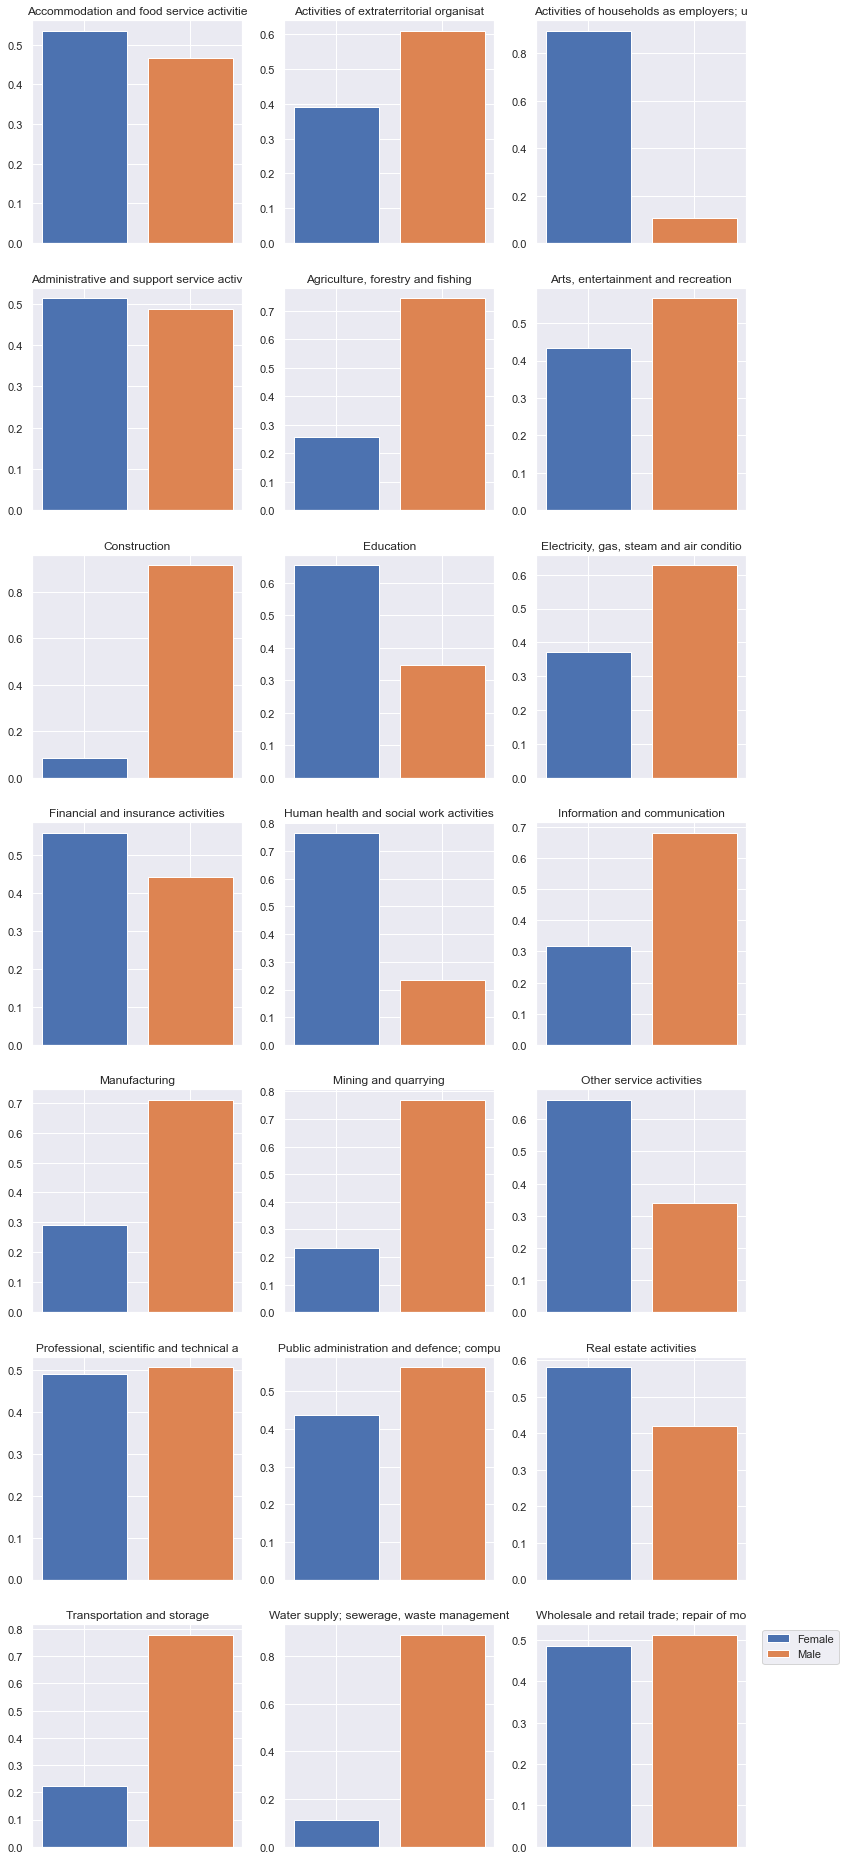

In [41]:
bardiagram(x='economic_sector', hue='sex', data=occupation[occupation.economic_sector != 'Economically inactive/unemployed'], legend=True)

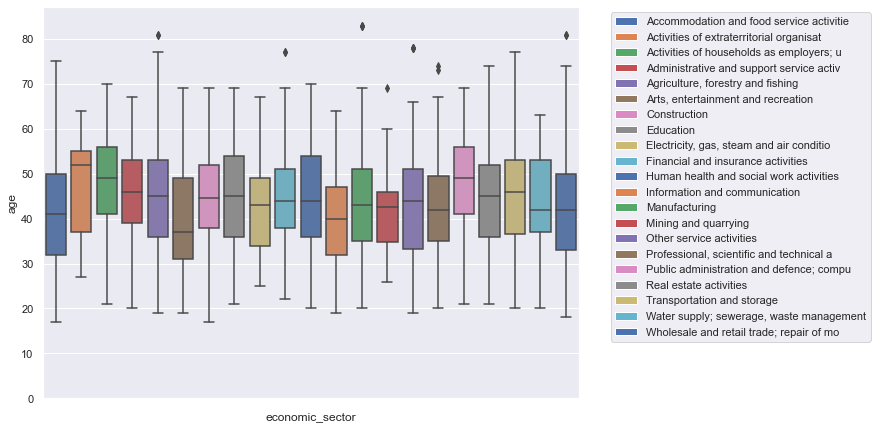

In [42]:
boxplot(x='economic_sector', y='age', data=occupation[occupation.economic_sector != 'Economically inactive/unemployed'].reset_index(), legend=True)

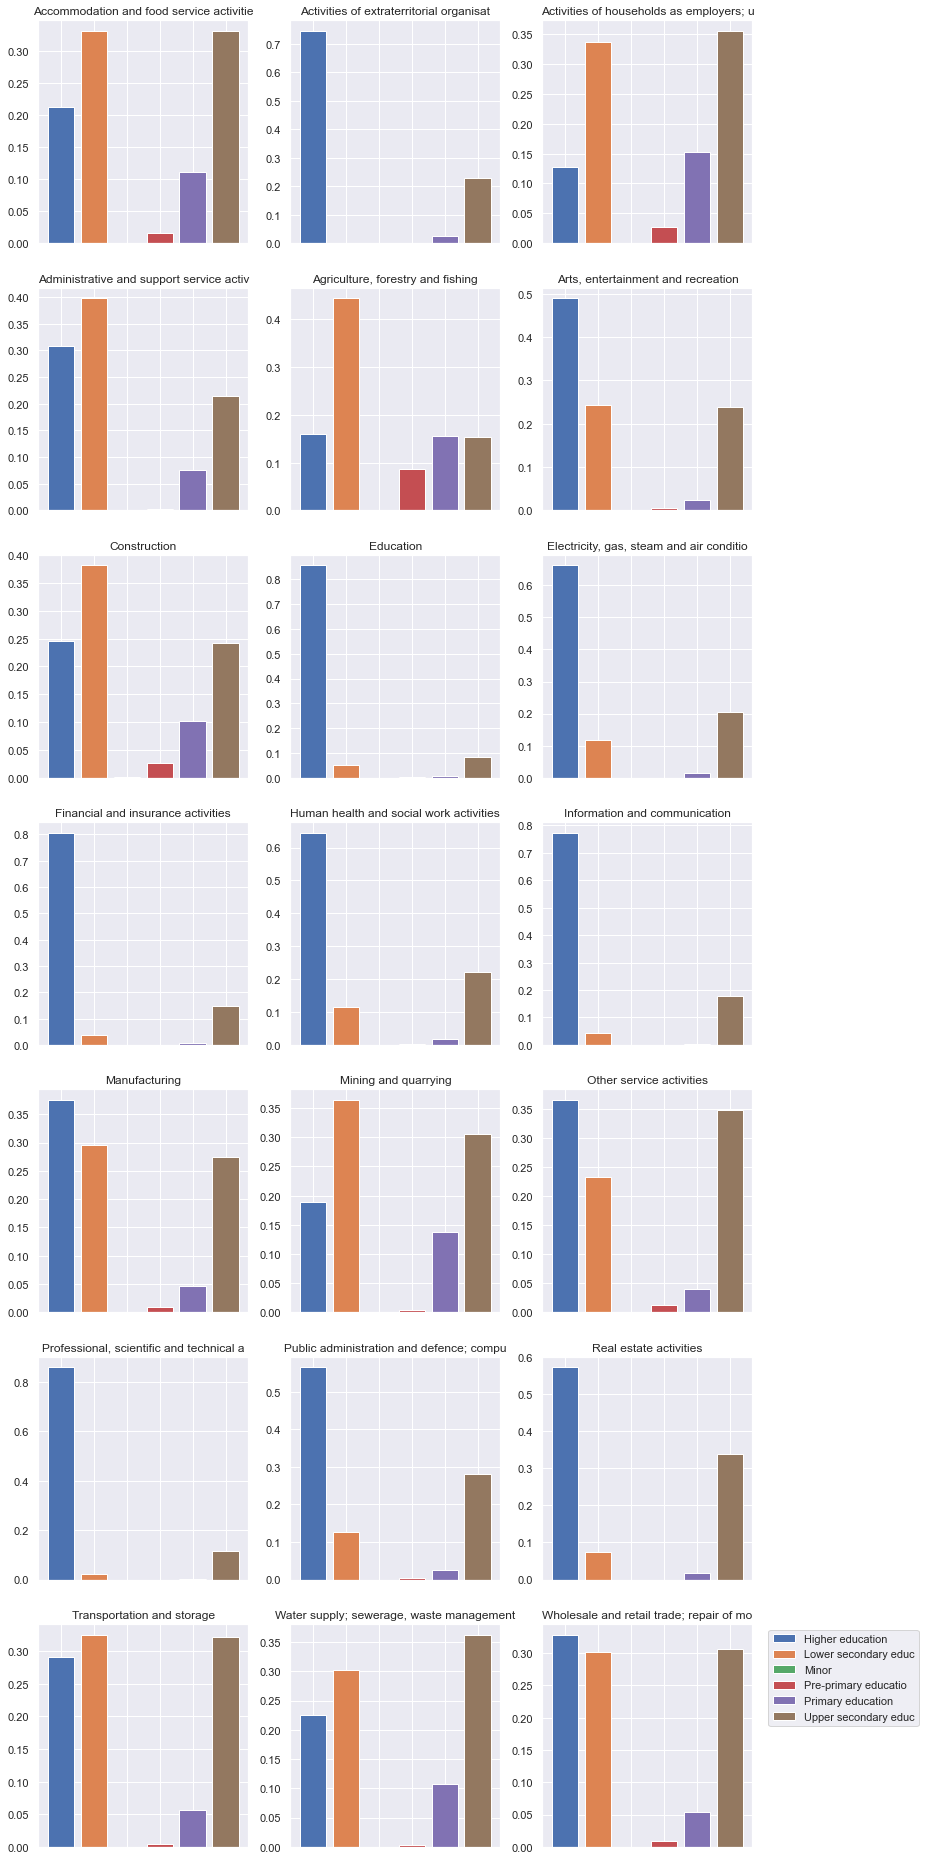

In [43]:
bardiagram(x='economic_sector', hue='education_level', data=occupation[occupation.economic_sector != 'Economically inactive/unemployed'], legend=True)

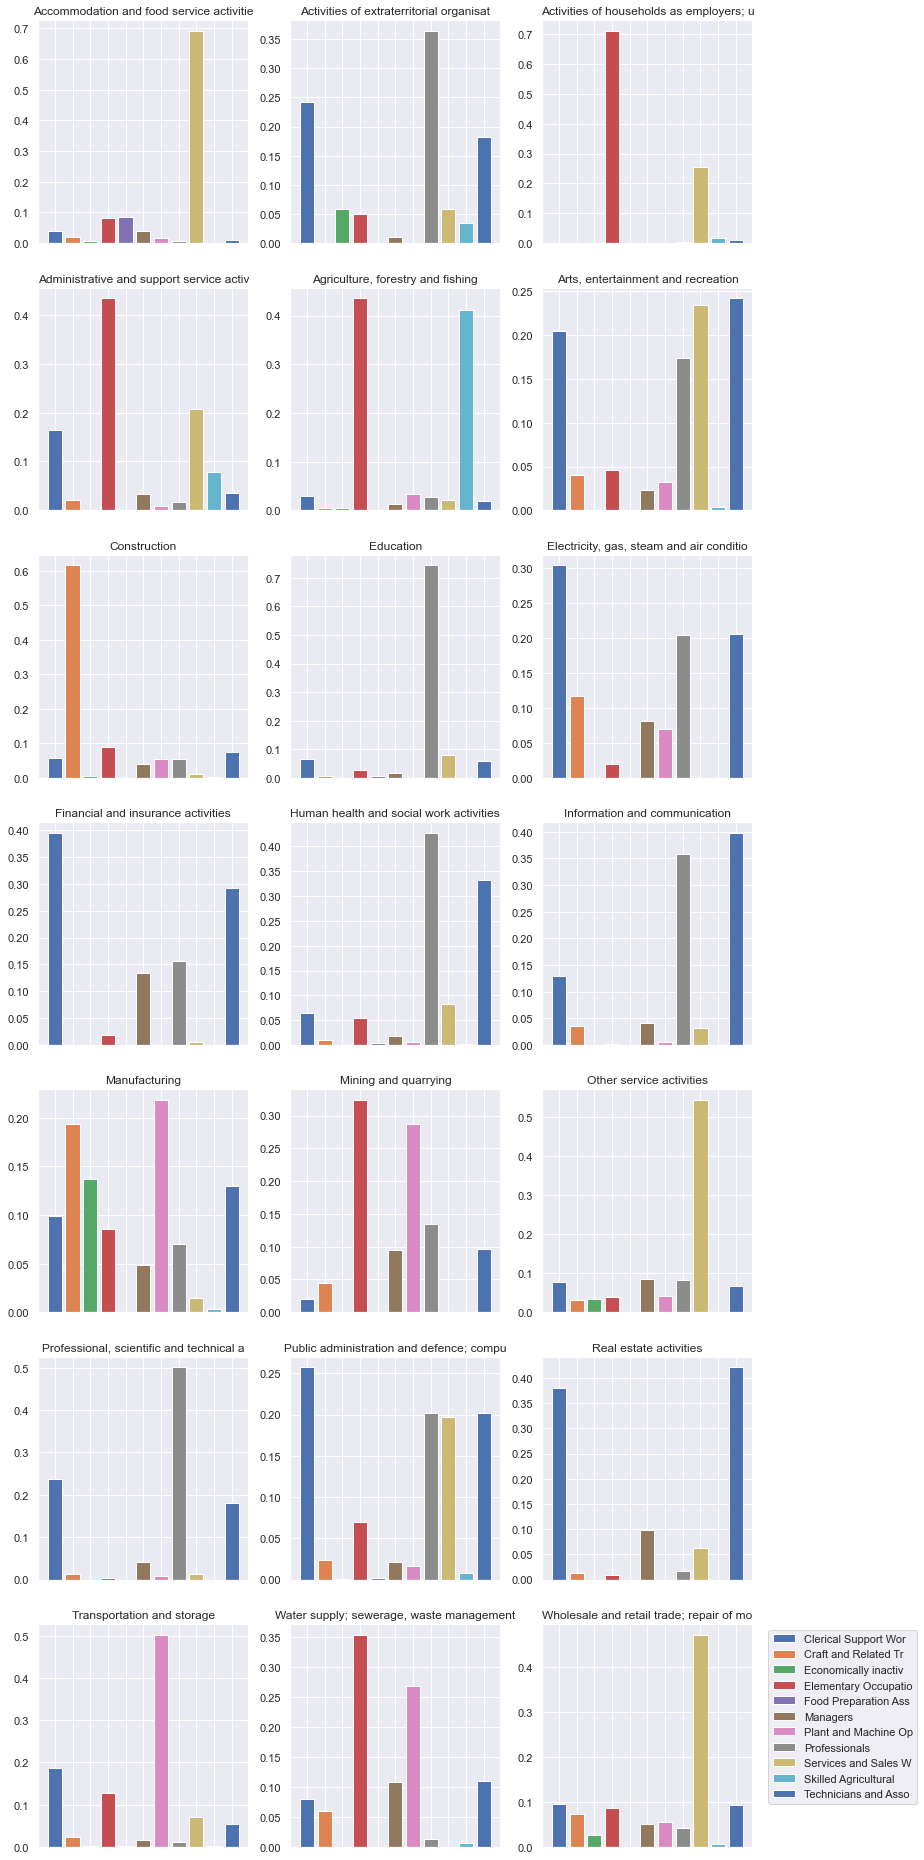

In [44]:
bardiagram(x='economic_sector', hue='occupation', data=occupation[occupation.economic_sector != 'Economically inactive/unemployed'], legend=True)

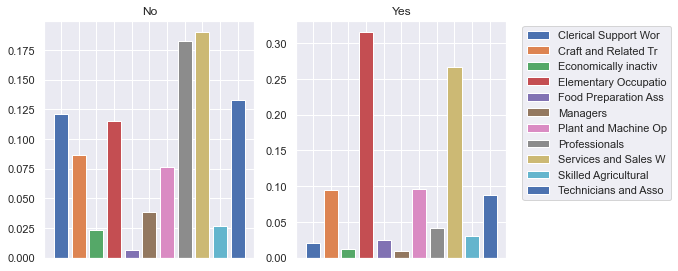

In [45]:
bardiagram(x='material_deprivation', hue='occupation', data=occupation[occupation.economic_sector != 'Economically inactive/unemployed'], legend=True)

In [46]:
occupation['years_worked'] = ilc['Number of years spent in paid work']

occupation.years_worked = occupation.years_worked.fillna(0)

occupation.years_worked = [int(value) if value != ' ' else 0 for value in occupation.years_worked]

occupation.head()

,id,weight,material_deprivation,sex,age,education_level,working_status,self_defined_working_status,working_status_agg,occupation,economic_sector,years_worked
0,101,906.15830,No,Male,70,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Clerical Support Workers,Economically inactive/unemployed,47
1,102,906.15830,No,Female,68,Upper secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Clerical Support Workers,Economically inactive/unemployed,2
2,201,1227.68869,No,Female,72,Lower secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Elementary Occupations,Economically inactive/unemployed,20
3,202,1227.68869,No,Male,60,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Services and Sales Workers,Economically inactive/unemployed,35
4,301,2559.35987,No,Female,54,Higher education,Disabled/unfit to work,Permanently disabled or/and unfit to work,Economically inactive,Services and Sales Workers,Economically inactive/unemployed,30


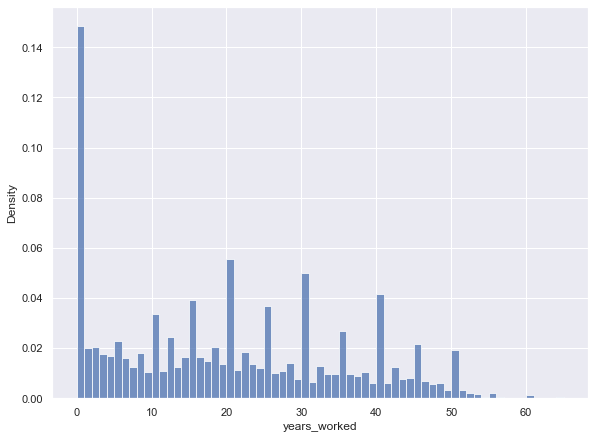

In [47]:
histplot(x='years_worked', data=occupation[occupation.working_status != 'Minor'], bins=max(occupation.years_worked))

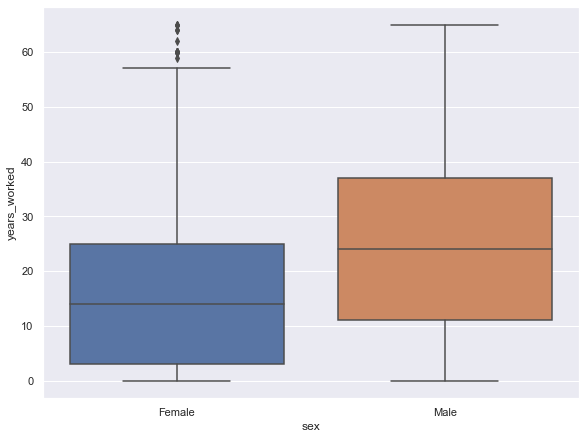

In [48]:
boxplot(x='sex', y='years_worked', data=occupation[occupation.working_status != 'Minor'].reset_index())

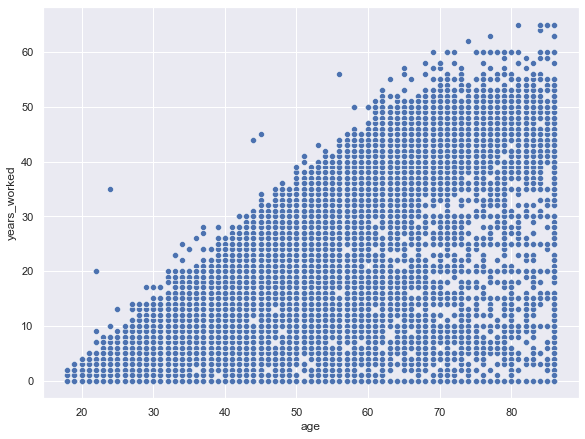

In [49]:
scatterplot(x='age', y='years_worked', data=occupation[occupation.working_status != 'Minor'].reset_index());

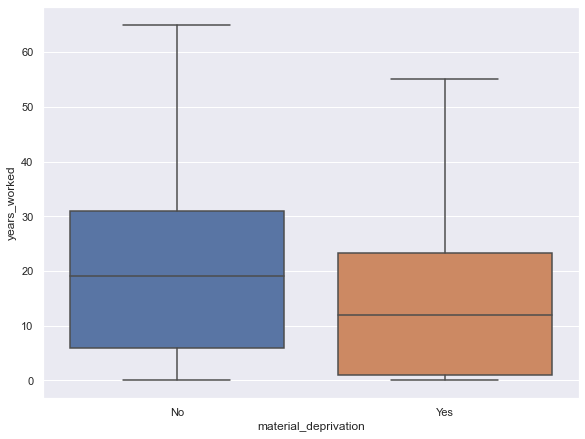

In [50]:
boxplot(x='material_deprivation', y='years_worked', data=occupation[occupation.working_status != 'Minor'].reset_index())

In [51]:
occupation['hours_week_worked'] = ilc['Number of hours usually worked per week in main job'] + ilc['Total number of hours usually worked in second, third, … jobs']
    
occupation.hours_week_worked = occupation.hours_week_worked.fillna(0)

occupation.hours_week_worked = [int(value) if value != '  ' else 0 for value in occupation.hours_week_worked]

occupation.hours_week_worked = [int(str(value)[:2]) for value in occupation.hours_week_worked]

occupation.head()

,id,weight,material_deprivation,sex,age,education_level,working_status,self_defined_working_status,working_status_agg,occupation,economic_sector,years_worked,hours_week_worked
0,101,906.15830,No,Male,70,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Clerical Support Workers,Economically inactive/unemployed,47,0
1,102,906.15830,No,Female,68,Upper secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Clerical Support Workers,Economically inactive/unemployed,2,0
2,201,1227.68869,No,Female,72,Lower secondary education,Unpaid carer/domestic worker,Fulfilling domestic tasks and care responsibil...,Economically inactive,Elementary Occupations,Economically inactive/unemployed,20,0
3,202,1227.68869,No,Male,60,Upper secondary education,Retired,In retirement or in early retirement or has gi...,Economically inactive,Services and Sales Workers,Economically inactive/unemployed,35,0
4,301,2559.35987,No,Female,54,Higher education,Disabled/unfit to work,Permanently disabled or/and unfit to work,Economically inactive,Services and Sales Workers,Economically inactive/unemployed,30,0


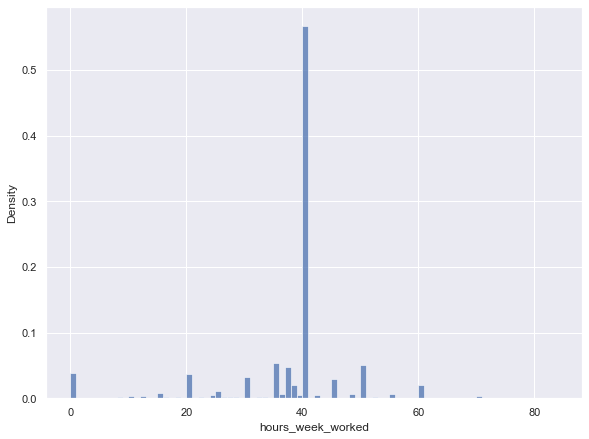

In [52]:
histplot(x='hours_week_worked', data=occupation[occupation.working_status_agg == 'Employed'].reset_index(), bins=max(occupation.hours_week_worked))

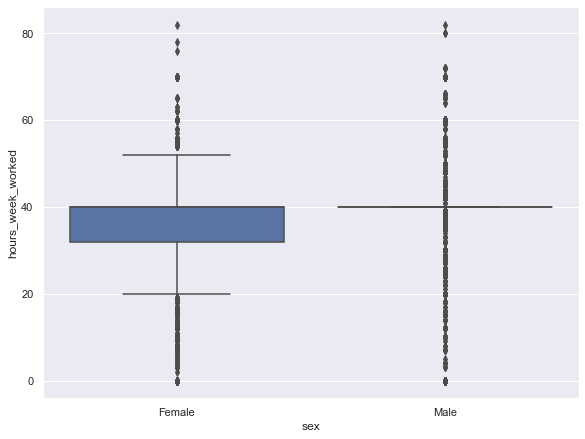

In [53]:
boxplot(x='sex', y='hours_week_worked', data=occupation[occupation.working_status_agg == 'Employed'].reset_index())

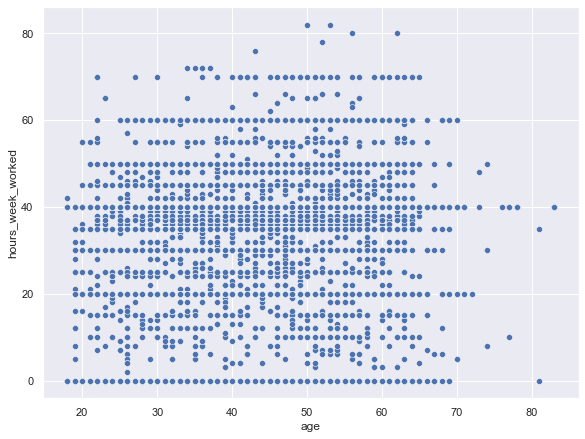

In [54]:
scatterplot(x='age', y='hours_week_worked', data=occupation[occupation.working_status_agg == 'Employed'].reset_index());

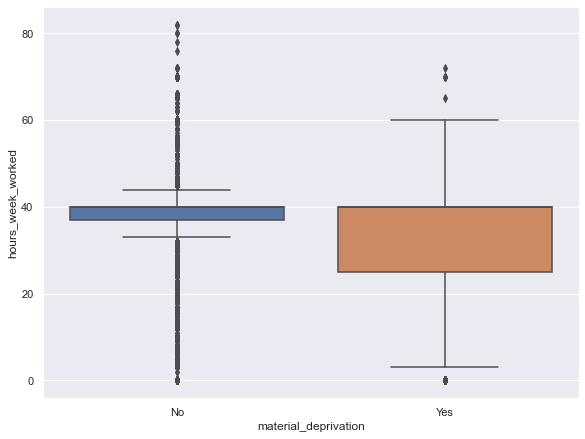

In [55]:
boxplot(x='material_deprivation', y='hours_week_worked', data=occupation[occupation.working_status_agg == 'Employed'].reset_index())

In [56]:
occupation['household_income'] = ilc['Total disposable household income']

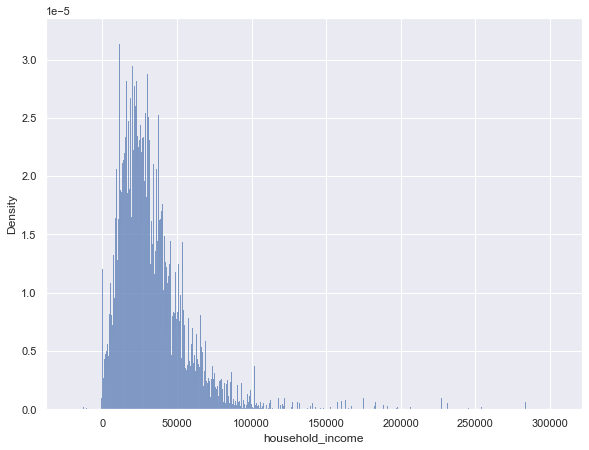

In [57]:
histplot(x='household_income', data=occupation, bins=1000)

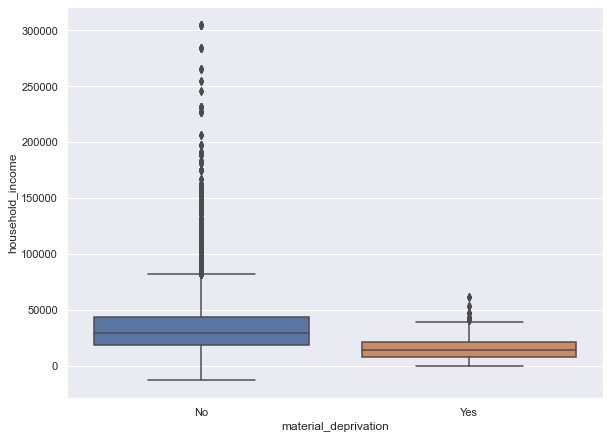

In [58]:
boxplot(x='material_deprivation', y='household_income', data=occupation)

In [59]:
occupation.columns

Index(['id', 'weight', 'material_deprivation', 'sex', 'age', 'education_level',
       'working_status', 'self_defined_working_status', 'working_status_agg',
       'occupation', 'economic_sector', 'years_worked', 'hours_week_worked',
       'household_income'],
      dtype='object')

In [60]:
occupation = occupation.drop(['self_defined_working_status', 'sex', 'age'], axis=1)

In [62]:
occupation.to_csv('occupation.csv')

In [63]:
for c in ilc.columns:
    print(c)

Personal ID
Personal cross-sectional weight
Year of birth
Sex
Basic activity status
Education at pre-school
Education at compulsory school
Childcare at centre-based services
Childcare at day-care centre
Childcare by a professional child-minder at child's home or at child-minder’s home
Childcare by grand-parents, other household members (outside parents), other relatives, friends or neighbours
Childrens’ cross-sectional weight for childcare
Living in household with low employement level
Living in household under risk of poverty
Marital status
Consensual Union
Country of birth
Citizenship
Current education activity
ISCED level currently attended
Year when highest level of education was attained
Highest ISCED level attained
Self-defined current economic status
Whether person has ever worked
Actively looking for a job
Available for work
Status in employment
Occupation
Number of hours usually worked per week in main job
Number of months spent at full-time work as employee
Number of months s